In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
#from pmdarima import auto_arima

# Nouvelle section

In [16]:
# Set styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_theme()

# Load Dataset
df = pd.read_csv("D:\\INSEA\\Stage PFA\\Stage Ministère de finance\\data\\tourism\\data+marrakach.csv")
print("Shape of dataset:", df.shape)

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.asfreq('MS')  # MS = Month Start
df = df.sort_index()

df.describe()

Shape of dataset: (174, 7)


C:\Users\masta\AppData\Local\Temp\ipykernel_17996\2446105115.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


,TES,MRE,Total Arrivées,Nuité,Taux d'occupation,marrakech_lag_1
count,172.000000,1.720000e+02,1.740000e+02,1.620000e+02,114.000000,173.000000
mean,470220.104651,4.461728e+05,9.163149e+05,1.659141e+06,43.640351,61.543353
std,167001.575197,3.041283e+05,4.291812e+05,5.073593e+05,7.996821,12.778280
min,2774.000000,8.131000e+03,1.090500e+04,2.702130e+05,11.000000,28.000000
25%,393843.250000,2.668118e+05,6.722868e+05,1.335398e+06,39.000000,54.000000
50%,468996.500000,3.155625e+05,8.034145e+05,1.674466e+06,43.500000,59.000000
75%,554268.250000,4.985570e+05,1.124125e+06,1.964652e+06,48.000000,72.000000
max,966724.000000,1.695181e+06,2.555368e+06,3.022911e+06,62.000000,100.000000


In [4]:
# #Google trends
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trends = pd.read_csv('/content/drive/MyDrive/malaya/google_trends.csv')
trends['month'] = pd.to_datetime(trends['month'])
trends.set_index('month', inplace=True)
trends = trends.asfreq('MS')  # MS = Month Start
trends = trends.sort_index()
# df['trend'] = scaler.fit_transform(trends[['trend']])
df['trend'] = trends[['trend']]
df.head()

,sales,trend
date,,
2005-01-01,67480.0,65
2005-02-01,81979.0,65
2005-03-01,109949.0,76
2005-04-01,116495.0,82
2005-05-01,103486.0,78


In [18]:
# Basic Info
print("\n=== Dataset Info ===\n")
print(df.info())
print("\n=== Summary Statistics ===\n")
print(df.describe())

# 4. Check Missing Values
print("\n=== Missing Values ===\n")
print(df.isnull().sum())




=== Dataset Info ===

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186 entries, 2010-01-01 to 2025-06-01
Freq: MS
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TES                172 non-null    float64
 1   MRE                172 non-null    float64
 2   Total Arrivées     174 non-null    float64
 3   Nuité              162 non-null    float64
 4   Taux d'occupation  114 non-null    float64
 5   marrakech_lag_1    173 non-null    float64
dtypes: float64(6)
memory usage: 10.2 KB
None

=== Summary Statistics ===

                 TES           MRE  Total Arrivées         Nuité  \
count     172.000000  1.720000e+02    1.740000e+02  1.620000e+02   
mean   470220.104651  4.461728e+05    9.163149e+05  1.659141e+06   
std    167001.575197  3.041283e+05    4.291812e+05  5.073593e+05   
min      2774.000000  8.131000e+03    1.090500e+04  2.702130e+05   
25%    393843.250000  2.668118e+05    6.722868

In [19]:
# Parse Dates
# Automatically detect date column
date_cols = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
print("\nDetected date columns:", date_cols)

if date_cols:
    df[date_cols[0]] = pd.to_datetime(df[date_cols[0]])
    df.set_index(date_cols[0], inplace=True)
else:
    print("⚠️ No date column detected. Please adjust manually.")



Detected date columns: []
⚠️ No date column detected. Please adjust manually.



Numeric Columns: ['TES', 'MRE', 'Total Arrivées', 'Nuité', "Taux d'occupation", 'marrakech_lag_1']


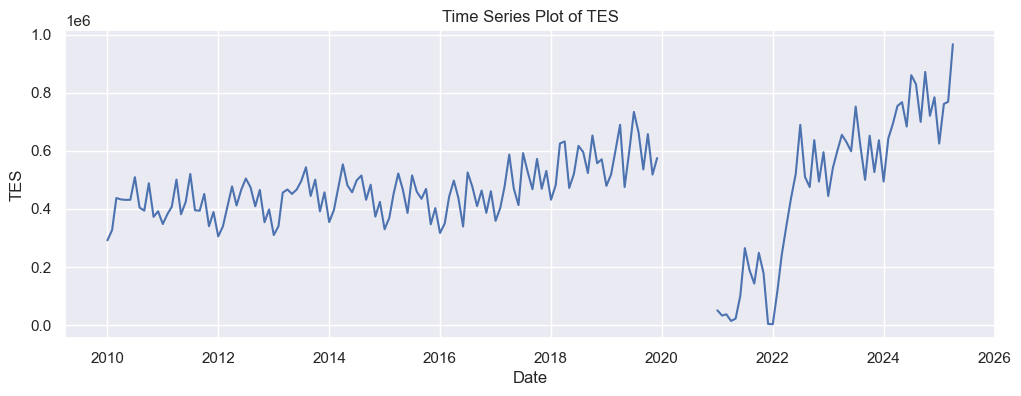

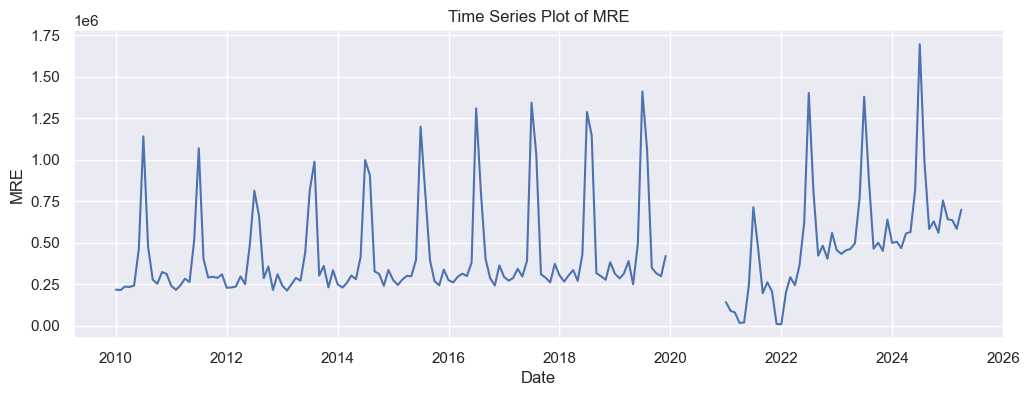

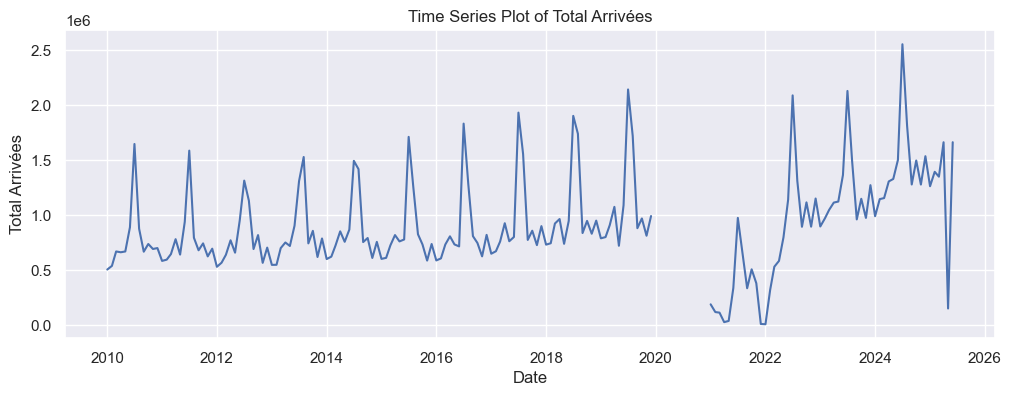

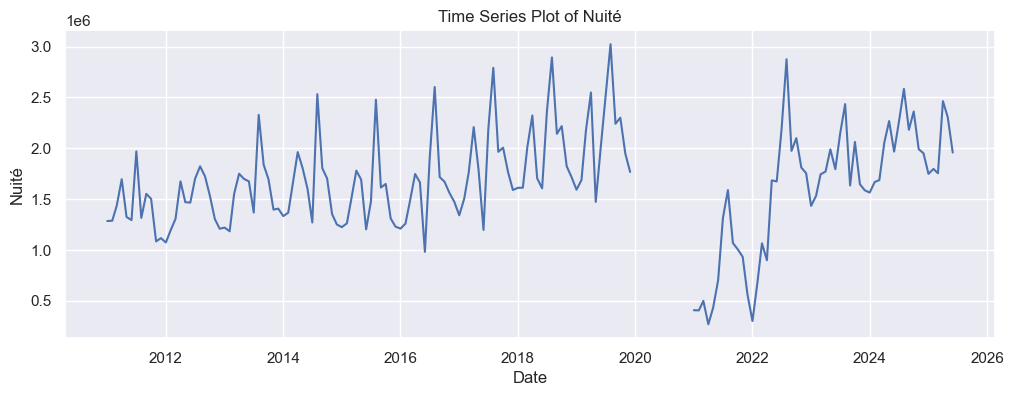

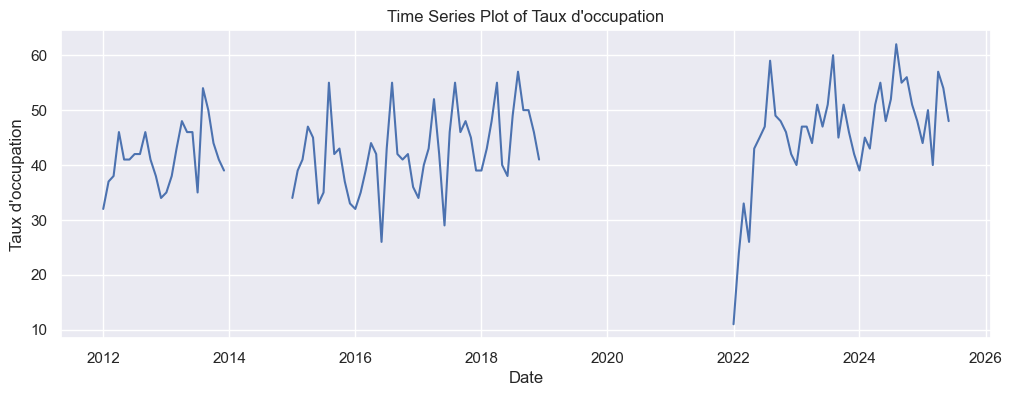

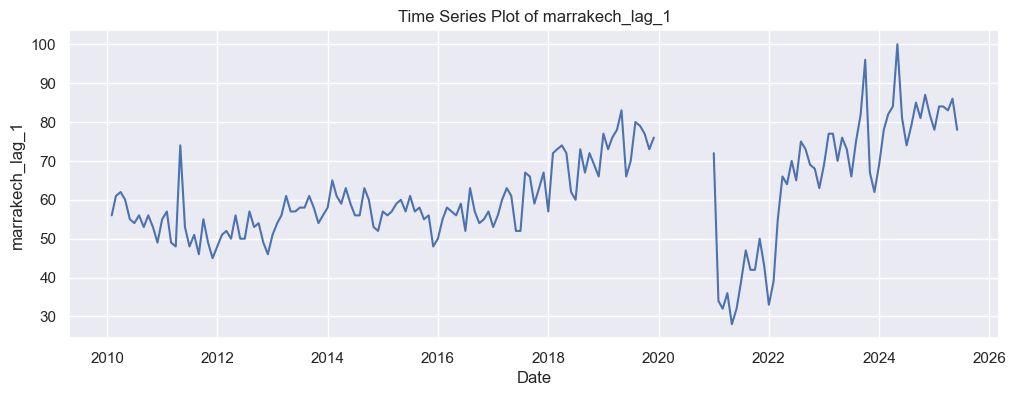

In [20]:
# Plotting Time Series
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print("\nNumeric Columns:", numeric_cols)

for col in numeric_cols:
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[col])
    plt.title(f'Time Series Plot of {col}')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.show()

# Optional: Interactive Plotly Plot
if numeric_cols:
    fig = px.line(df, y=numeric_cols[0], title=f'{numeric_cols[0]} Over Time')
    fig.show()


                 TES           MRE  Total Arrivées         Nuité  \
count     172.000000  1.720000e+02    1.740000e+02  1.620000e+02   
mean   470220.104651  4.461728e+05    9.163149e+05  1.659141e+06   
std    167001.575197  3.041283e+05    4.291812e+05  5.073593e+05   
min      2774.000000  8.131000e+03    1.090500e+04  2.702130e+05   
25%    393843.250000  2.668118e+05    6.722868e+05  1.335398e+06   
50%    468996.500000  3.155625e+05    8.034145e+05  1.674466e+06   
75%    554268.250000  4.985570e+05    1.124125e+06  1.964652e+06   
max    966724.000000  1.695181e+06    2.555368e+06  3.022911e+06   

       Taux d'occupation  marrakech_lag_1  
count         114.000000       173.000000  
mean           43.640351        61.543353  
std             7.996821        12.778280  
min            11.000000        28.000000  
25%            39.000000        54.000000  
50%            43.500000        59.000000  
75%            48.000000        72.000000  
max            62.000000       100.

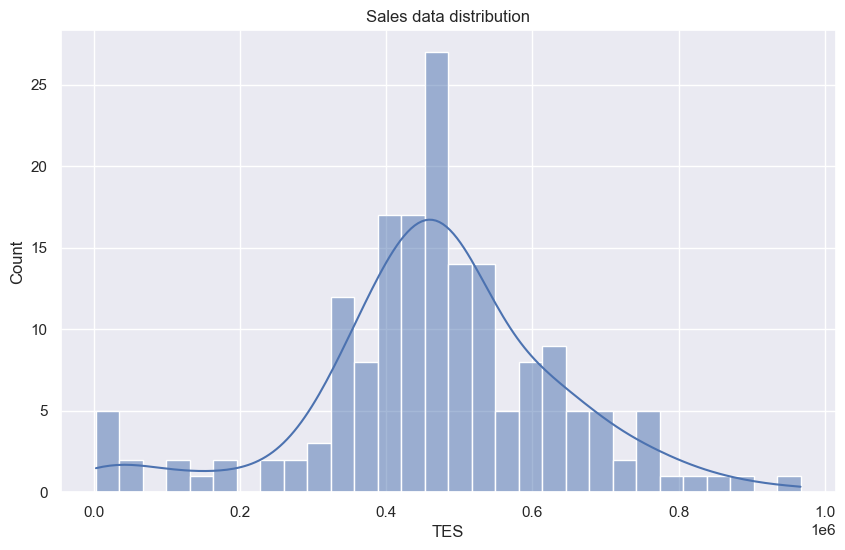

In [22]:
print(df.describe())

# Histogramme + KDE
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['TES'], kde=True, bins=30)
plt.title("Sales data distribution")
plt.show()

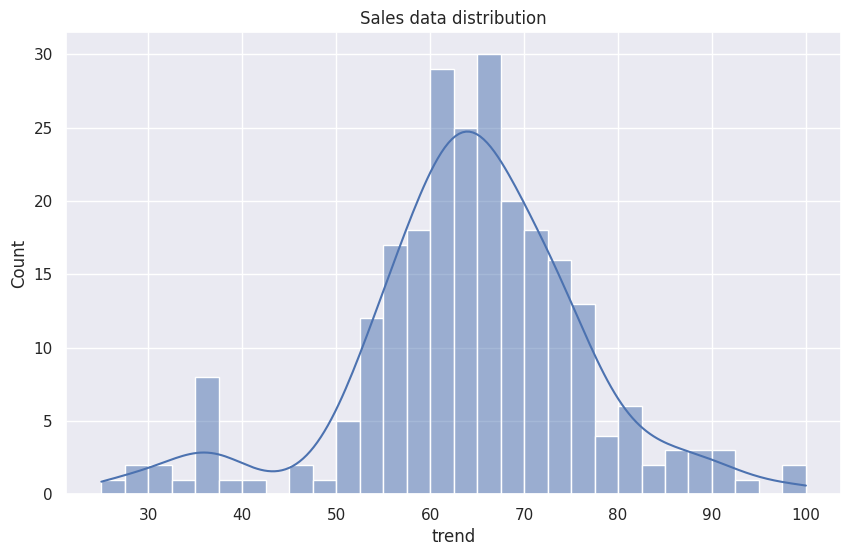

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df['trend'], kde=True, bins=30)
plt.title("Sales data distribution")
plt.show()

In [23]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['TES'])
print(f'Stationarity test: p-value = {float(result[1])}')

MissingDataError: exog contains inf or nans

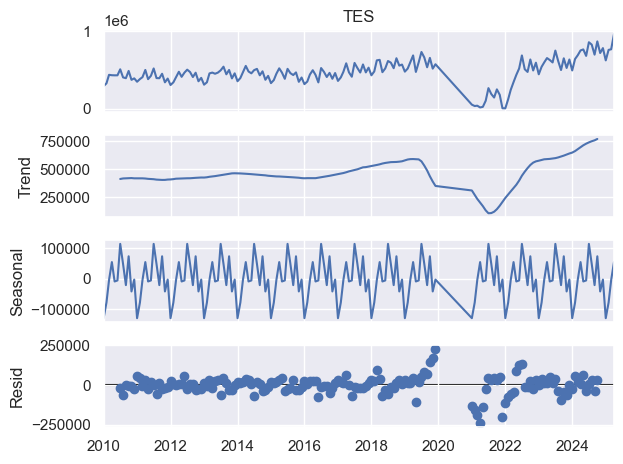

In [24]:
# Seasonal Decomposition
try:
    from statsmodels.tsa.seasonal import seasonal_decompose

    if numeric_cols:
        result = seasonal_decompose(df[numeric_cols[0]].dropna(), model='additive', period=12)
        result.plot()
        plt.show()
except ImportError:
    print("Statsmodels not installed. Skipping seasonal decomposition.")


ADF p-value (original): 0.14651168977053536
ADF p-value (1st diff): 0.030627523625261357
ADF p-value (1st + seasonal diff): 8.94697627029527e-22


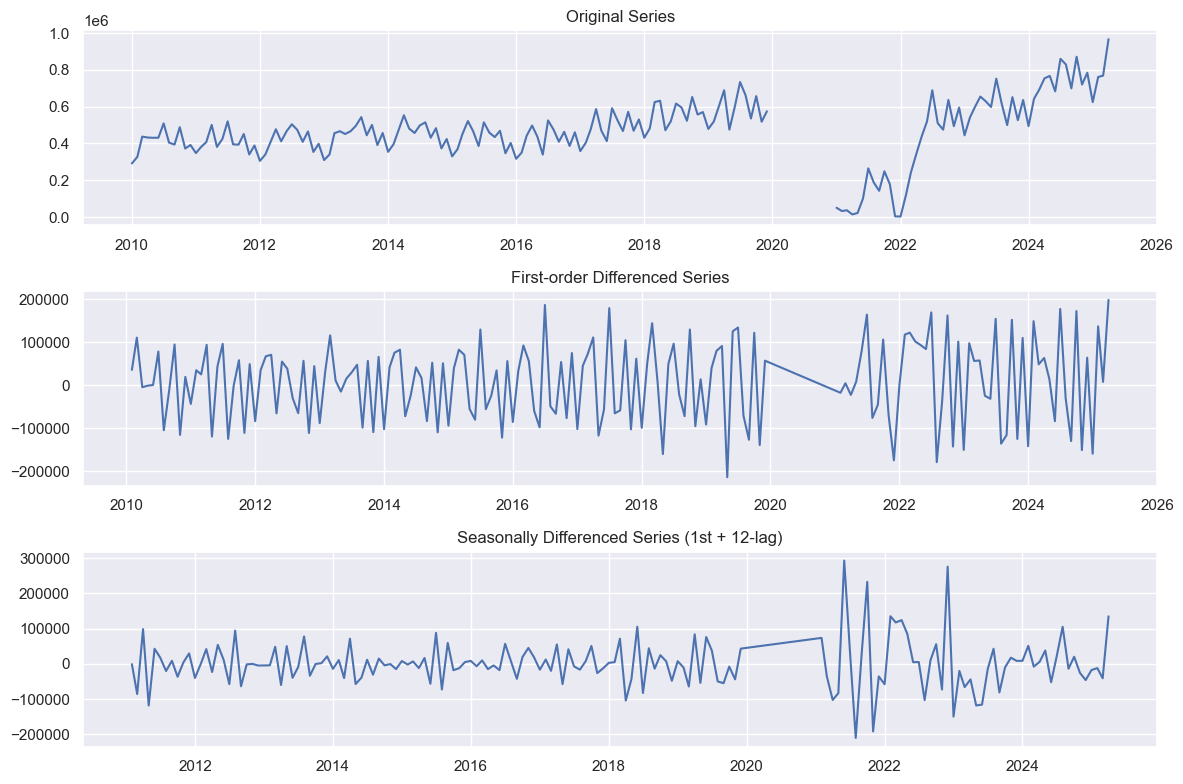

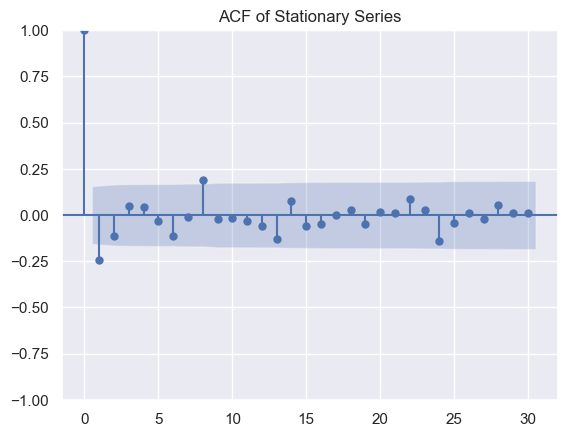

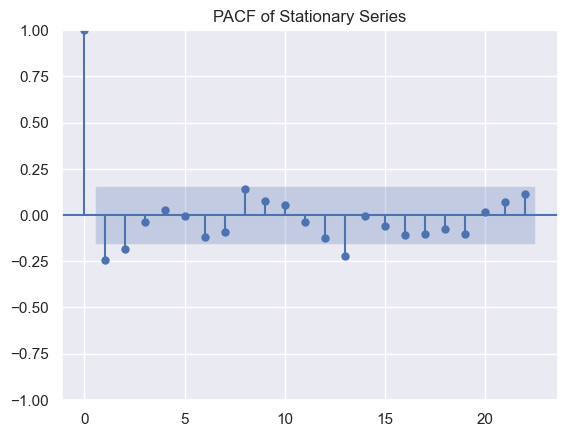

In [26]:
ts = df['TES']  # Replace 'sales' with the actual column name

# 2. Check stationarity of the original series
print("ADF p-value (original):", adfuller(ts.dropna())[1])

# 3. First-order differencing
ts_d1 = ts.diff().dropna()
print("ADF p-value (1st diff):", adfuller(ts_d1)[1])

# 4. Seasonal differencing (e.g., monthly data with yearly seasonality s=12)
ts_d12 = ts_d1.diff(12).dropna()
print("ADF p-value (1st + seasonal diff):", adfuller(ts_d12)[1])

# 5. Plot original and differenced series
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(ts)
plt.title('Original Series')

plt.subplot(3, 1, 2)
plt.plot(ts_d1)
plt.title('First-order Differenced Series')

plt.subplot(3, 1, 3)
plt.plot(ts_d12)
plt.title('Seasonally Differenced Series (1st + 12-lag)')
plt.tight_layout()
plt.show()

# 6. Plot ACF and PACF of the final stationary series
plot_acf(ts_d12,lags=30)
plt.title("ACF of Stationary Series")
plt.show()

plot_pacf(ts_d12)
plt.title("PACF of Stationary Series")
plt.show()

In [13]:
trends

,trend
month,
2005-01-01,65
2005-02-01,65
2005-03-01,76
2005-04-01,82
2005-05-01,78
...,...
2025-02-01,67
2025-03-01,75
2025-04-01,71
